In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False
warnings.simplefilter('ignore')

In [41]:
df = pd.read_csv('CCTV_in_Seoul.csv', encoding='utf-8',index_col='기관명')
df

소계  2013년도 이전  2014년  2015년  2016년
기관명                                       
강남구   2780       1292    430    584    932
강동구    773        379     99    155    377
강북구    748        369    120    138    204
강서구    884        388    258    184     81
관악구   1496        846    260    390    613
광진구    707        573     78     53    174
구로구   1561       1142    173    246    323
금천구   1015        674     51    269    354
노원구   1265        542     57    451    516
도봉구    485        238    159     42    386
동대문구  1294       1070     23    198    579
동작구   1091        544    341    103    314
마포구    574        314    118    169    379
서대문구   962        844     50     68    292
서초구   1930       1406    157    336    398
성동구   1062        730     91    241    265
성북구   1464       1009     78    360    204
송파구    618        529     21     68    463
양천구   2034       1843    142     30    467
영등포구   904        495    214    195    373
용산구   1624       1368    218    112    398
은평구   1873       1138    224    278    468
종로구   1002        464    314    211    630
중구     671        413    190     72    348
중랑구    660        509    121    177    109

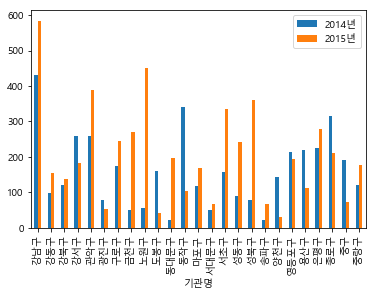

In [22]:
df[['2014년','2015년']].plot(kind='bar')
plt.show()

In [29]:
df.sort_values(by='소계',ascending=False)['2014년'].head()

기관명
강남구    430
양천구    142
서초구    157
은평구    224
용산구    218
Name: 2014년, dtype: int64

In [42]:
df['설치 정도']=df.apply(lambda v: '높음' if v[0]>=10000 else '낮음',axis=1)
df

소계  2013년도 이전  2014년  2015년  2016년 설치 정도
기관명                                             
강남구   2780       1292    430    584    932    낮음
강동구    773        379     99    155    377    낮음
강북구    748        369    120    138    204    낮음
강서구    884        388    258    184     81    낮음
관악구   1496        846    260    390    613    낮음
광진구    707        573     78     53    174    낮음
구로구   1561       1142    173    246    323    낮음
금천구   1015        674     51    269    354    낮음
노원구   1265        542     57    451    516    낮음
도봉구    485        238    159     42    386    낮음
동대문구  1294       1070     23    198    579    낮음
동작구   1091        544    341    103    314    낮음
마포구    574        314    118    169    379    낮음
서대문구   962        844     50     68    292    낮음
서초구   1930       1406    157    336    398    낮음
성동구   1062        730     91    241    265    낮음
성북구   1464       1009     78    360    204    낮음
송파구    618        529     21     68    463    낮음
양천구   2034       1843    142     30    467    낮음
영등포구   904        495    214    195    373    낮음
용산구   1624       1368    218    112    398    낮음
은평구   1873       1138    224    278    468    낮음
종로구   1002        464    314    211    630    낮음
중구     671        413    190     72    348    낮음
중랑구    660        509    121    177    109    낮음

In [36]:
df[df['2015년']==df['2015년'].max()][['2014년','2015년']]

2014년  2015년
기관명              
강남구    430    584

In [43]:
df['2013년도 이전과 2016년의 증가율'] = df['2016년']/df['2013년도 이전']
df

소계  2013년도 이전  2014년  2015년  2016년 설치 정도  2013년도 이전과 2016년의 증가율
기관명                                                                    
강남구   2780       1292    430    584    932    낮음               0.721362
강동구    773        379     99    155    377    낮음               0.994723
강북구    748        369    120    138    204    낮음               0.552846
강서구    884        388    258    184     81    낮음               0.208763
관악구   1496        846    260    390    613    낮음               0.724586
광진구    707        573     78     53    174    낮음               0.303665
구로구   1561       1142    173    246    323    낮음               0.282837
금천구   1015        674     51    269    354    낮음               0.525223
노원구   1265        542     57    451    516    낮음               0.952030
도봉구    485        238    159     42    386    낮음               1.621849
동대문구  1294       1070     23    198    579    낮음               0.541121
동작구   1091        544    341    103    314    낮음               0.577206
마포구    574        314    118    169    379    낮음               1.207006
서대문구   962        844     50     68    292    낮음               0.345972
서초구   1930       1406    157    336    398    낮음               0.283073
성동구   1062        730     91    241    265    낮음               0.363014
성북구   1464       1009     78    360    204    낮음               0.202180
송파구    618        529     21     68    463    낮음               0.875236
양천구   2034       1843    142     30    467    낮음               0.253391
영등포구   904        495    214    195    373    낮음               0.753535
용산구   1624       1368    218    112    398    낮음               0.290936
은평구   1873       1138    224    278    468    낮음               0.411248
종로구   1002        464    314    211    630    낮음               1.357759
중구     671        413    190     72    348    낮음               0.842615
중랑구    660        509    121    177    109    낮음               0.214145

In [45]:
def fn(v):
    if v>=1.2:
        return '급증'
    elif v>=1:
        return '보통'
    else:
        return '낮음'
    
df['증가율정도']=df['2013년도 이전과 2016년의 증가율'].apply(fn)
df

소계  2013년도 이전  2014년  2015년  2016년 설치 정도  2013년도 이전과 2016년의 증가율 증가율정도
기관명                                                                          
강남구   2780       1292    430    584    932    낮음               0.721362    낮음
강동구    773        379     99    155    377    낮음               0.994723    낮음
강북구    748        369    120    138    204    낮음               0.552846    낮음
강서구    884        388    258    184     81    낮음               0.208763    낮음
관악구   1496        846    260    390    613    낮음               0.724586    낮음
광진구    707        573     78     53    174    낮음               0.303665    낮음
구로구   1561       1142    173    246    323    낮음               0.282837    낮음
금천구   1015        674     51    269    354    낮음               0.525223    낮음
노원구   1265        542     57    451    516    낮음               0.952030    낮음
도봉구    485        238    159     42    386    낮음               1.621849    급증
동대문구  1294       1070     23    198    579    낮음               0.541121    낮음
동작구   1091        544    341    103    314    낮음               0.577206    낮음
마포구    574        314    118    169    379    낮음               1.207006    급증
서대문구   962        844     50     68    292    낮음               0.345972    낮음
서초구   1930       1406    157    336    398    낮음               0.283073    낮음
성동구   1062        730     91    241    265    낮음               0.363014    낮음
성북구   1464       1009     78    360    204    낮음               0.202180    낮음
송파구    618        529     21     68    463    낮음               0.875236    낮음
양천구   2034       1843    142     30    467    낮음               0.253391    낮음
영등포구   904        495    214    195    373    낮음               0.753535    낮음
용산구   1624       1368    218    112    398    낮음               0.290936    낮음
은평구   1873       1138    224    278    468    낮음               0.411248    낮음
종로구   1002        464    314    211    630    낮음               1.357759    급증
중구     671        413    190     72    348    낮음               0.842615    낮음
중랑구    660        509    121    177    109    낮음               0.214145    낮음